<a href="https://colab.research.google.com/github/intuition-explorer/ML-Algorithms/blob/main/perf_portmath_EDA_clean_validate_testmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving student-mat.csv to student-mat (1).csv
Saving student-por.csv to student-por (1).csv


{'student-mat (1).csv': b'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3\n"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6\n"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6\n"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10\n"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15\n"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10\n"GP";"M";16;"U";"LE3";"T";4;3;"ser

In [4]:
import pandas as pd
mat_url = "/content/student-mat.csv"
por_url = "/content/student-por.csv"

mat = pd.read_csv(mat_url, sep=";")
por = pd.read_csv(por_url, sep=";")

mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# EXPLORATORY DATA ANALYSIS (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #ontop of matplotlib, better pics easier to use and don't have to compute stats myself

# Combine Math and Portuguese datasets into one DataFrame
df = pd.concat([mat, por], ignore_index=True) #python list in []
#ignore index makes it so that indicies from diff data sets dont repeat say 0 1 for bob alice in 1 then 0 1 for joe and tom in second, makes it 0123

In [6]:
#There are 382 students that repeat; keep as duplicates as diff courses for now, but identify. They will have several same features, but grades diff 'cause of courses
# list of columns to match students (exclude grade columns)
id_cols = [col for col in mat.columns if col not in ['G1', 'G2', 'G3']]
# find overlaps
overlaps = pd.merge(mat, por, on=id_cols, how='inner', suffixes=('_math', '_portuguese'))
print(f"Number of overlapping students: {len(overlaps)}")
overlaps.head()

Number of overlapping students: 39


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_math,G2_math,G3_math,G1_portuguese,G2_portuguese,G3_portuguese
0,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,12,12,11,13,12,13
1,GP,M,15,U,GT3,A,2,2,other,other,...,1,1,3,0,14,16,16,14,14,15
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,1,1,0,13,14,15,12,13,14
3,GP,M,15,U,GT3,T,4,4,health,health,...,1,1,5,0,12,15,15,11,12,12
4,GP,M,15,U,GT3,T,4,4,health,services,...,3,4,5,0,9,11,12,10,11,11


In [7]:
print("Shape of dataset:", df.shape)  # 1044 students/samples and 33 features
print("\nColumn types and non-null counts:")
print(df.info()) #always shows non-null count and Dtype
#Check for miss is redundant but df.isnull() returns Boolean and then .sum() gives us total count

print("\nSummary statistics:")
print(df.describe()) #fast overview of data distrubtion: mean, std, IQR
print(f"Num of columns described, as numerical only: {df.describe().shape[1]}") #it would return 8,16 if didn't specify but the rows are the stats so not useful

Shape of dataset: (1044, 33)

Column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-nul

In [8]:
#33 features aren't human readable, define a dictionary using the ReadMe
feature_descriptions = {
    'school': "Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)",
    'sex': "Student's sex (binary: 'F' - female or 'M' - male)",
    'age': "Student's age (numeric: from 15 to 22)",
    'address': "Student's home address type (binary: 'U' - urban or 'R' - rural)",
    'famsize': "Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)",
    'Pstatus': "Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)",
    'Medu': "Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education)",
    'Fedu': "Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education)",
    'Mjob': "Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",
    'Fjob': "Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",
    'reason': "Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')",
    'guardian': "Student's guardian (nominal: 'mother', 'father' or 'other')",
    'traveltime': "Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)",
    'studytime': "Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)",
    'failures': "Number of past class failures (numeric: n if 1<=n<3, else 4)",
    'schoolsup': "Extra educational support (binary: yes or no)",
    'famsup': "Family educational support (binary: yes or no)",
    'paid': "Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)",
    'activities': "Extra-curricular activities (binary: yes or no)",
    'nursery': "Attended nursery school (binary: yes or no)",
    'higher': "Wants to take higher education (binary: yes or no)",
    'internet': "Internet access at home (binary: yes or no)",
    'romantic': "With a romantic relationship (binary: yes or no)",
    'famrel': "Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)",
    'freetime': "Free time after school (numeric: from 1 - very low to 5 - very high)",
    'goout': "Going out with friends (numeric: from 1 - very low to 5 - very high)",
    'Dalc': "Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)",
    'Walc': "Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)",
    'health': "Current health status (numeric: from 1 - very bad to 5 - very good)",
    'absences': "Number of school absences (numeric: from 0 to 93)",
    'G1': "First period grade (numeric: from 0 to 20)",
    'G2': "Second period grade (numeric: from 0 to 20)",
    'G3': "Final grade (numeric: from 0 to 20, output target)"
}

for col in df.columns:
    desc = feature_descriptions.get(col, "No description available") #from dict get key and returns its description, if none available outputs "no desc"
    print(f"{col}: {desc}")


school: Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex: Student's sex (binary: 'F' - female or 'M' - male)
age: Student's age (numeric: from 15 to 22)
address: Student's home address type (binary: 'U' - urban or 'R' - rural)
famsize: Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus: Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education)
Fedu: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education)
Mjob: Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob: Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')


<Axes: xlabel='G1', ylabel='Count'>

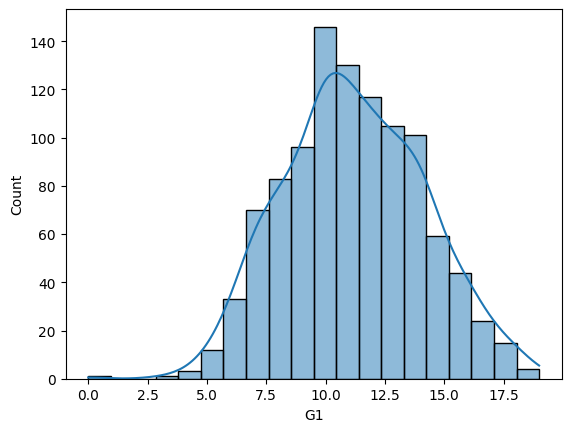

In [9]:
sns.histplot(df['G1'], bins=20, kde=True) # split bars/bins into 20 (seems ideal), KDE smoothing curve

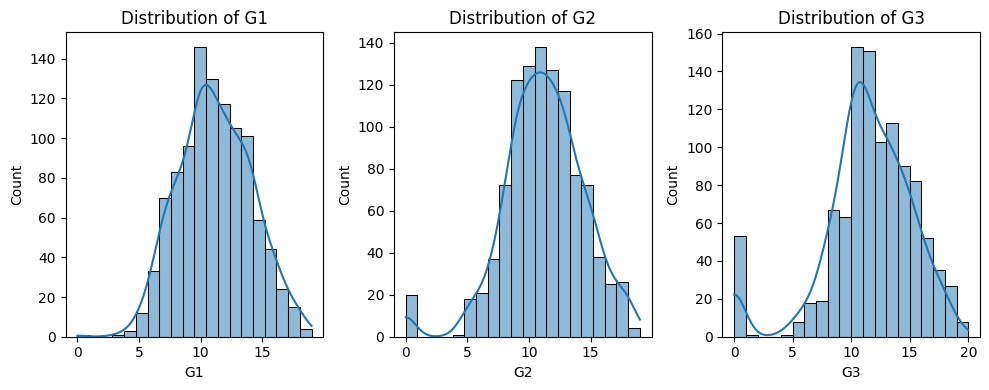

In [10]:
# Visualize grade distributions
plt.figure(figsize=(10,4))

#enumerate() takes the list and returns pairs: index and value: output would be [(0,G1),]
for i, col in enumerate(["G1", "G2", "G3"]): #loop over columns with index i

#i to place the subplot in the correct location
    plt.subplot(1, 3, i+1) #1 row and 3 columns (has to be >=3) all plots in 1 row with 3 side by side | the i+1 makes it 3 diff plots as locations
    sns.histplot(df[col], bins=20, kde=True) #df[col] is then df[G1],..
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [11]:
print(df.corr(numeric_only=True))

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.130196 -0.138521    0.049216  -0.007870  0.282364   
Medu       -0.130196  1.000000  0.642063   -0.238181   0.090616 -0.187769   
Fedu       -0.138521  0.642063  1.000000   -0.196328   0.033458 -0.191390   
traveltime  0.049216 -0.238181 -0.196328    1.000000  -0.081328  0.087177   
studytime  -0.007870  0.090616  0.033458   -0.081328   1.000000 -0.152024   
failures    0.282364 -0.187769 -0.191390    0.087177  -0.152024  1.000000   
famrel      0.007162  0.015004  0.013066   -0.012578   0.012324 -0.053676   
freetime    0.002645  0.001054  0.002142   -0.007403  -0.094429  0.102679   
goout       0.118510  0.025614  0.030075    0.049740  -0.072941  0.074683   
Dalc        0.133453  0.001515 -0.000165    0.109423  -0.159665  0.116336   
Walc        0.098291 -0.029331  0.019524    0.084292  -0.229073  0.107432   
health     -0.029129 -0.013254  0.034288   -0.029002  -0.063044  0.048311   

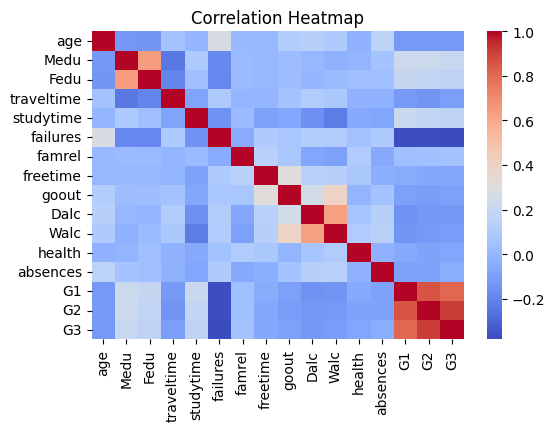

In [12]:
#Visualize Correlation Matrix = heatmap (numeric columns)
plt.figure(figsize=(6,4))

corr = df.corr(numeric_only=True) #correlation matrix (Pearson correlation=default)
sns.heatmap(corr, annot=False, cmap="coolwarm") #false means colour no text, cmap Blue=Negative, Red=Positive

plt.title("Correlation Heatmap")
plt.show()

In [13]:
#Purpose is to check for data leakage and prevents overfitting + dimensionality (target leakage look for as well)
#Or more interestingly if features are correlated, implies linear dependence of columns (or at least partial) so
high_corr = corr[(corr > 0.9) & (corr != 1.0)] #Creates Boolean=True, when corr > 0.9 &=both corr !=1 (this ignores features that correlate with itself)
print(high_corr)

            age  Medu  Fedu  traveltime  studytime  failures  famrel  \
age         NaN   NaN   NaN         NaN        NaN       NaN     NaN   
Medu        NaN   NaN   NaN         NaN        NaN       NaN     NaN   
Fedu        NaN   NaN   NaN         NaN        NaN       NaN     NaN   
traveltime  NaN   NaN   NaN         NaN        NaN       NaN     NaN   
studytime   NaN   NaN   NaN         NaN        NaN       NaN     NaN   
failures    NaN   NaN   NaN         NaN        NaN       NaN     NaN   
famrel      NaN   NaN   NaN         NaN        NaN       NaN     NaN   
freetime    NaN   NaN   NaN         NaN        NaN       NaN     NaN   
goout       NaN   NaN   NaN         NaN        NaN       NaN     NaN   
Dalc        NaN   NaN   NaN         NaN        NaN       NaN     NaN   
Walc        NaN   NaN   NaN         NaN        NaN       NaN     NaN   
health      NaN   NaN   NaN         NaN        NaN       NaN     NaN   
absences    NaN   NaN   NaN         NaN        NaN       NaN    

In [14]:
#G2 and G3 correlated, these are sem 1, 2 and final grade(may include exams) so maybe final semeseter most correlated to final grade
#The goal will be to predict G3 that'll be the target and it's most correlated to G2 (maybe should omit this), what about G1?
grade_corr = df[['G1', 'G2', 'G3']].corr(numeric_only=True)

print(grade_corr)
first_row = grade_corr.iloc[0] #iloc=integer locator index (for Data Frame)
#print(first_row)

#Variance Inflation Factor how much a predictor variable is “inflated” in variance because it’s correlated with other predictors (don't need atm)=multicollinearity
#I will set G3 as target and drop G1 and G2 as that would be target leakage

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [15]:
# Set target
y = df['G3']

# Drop G1 and G2 to avoid leakage
X = df.drop(columns=['G1', 'G2', 'G3']).copy() #use this to separate features from orginal so don't adjust df

print(y.head())
print(X.head())

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3     

In [16]:
#X["sex_binary"] = X["sex"].map({"M": 0, "F": 1})
#Goes into df col sex and converts M to 0 and F to 1, stored in new column or could overwrite but i think safer
print(X.head(1))
#now drop sex col
X=X.drop(columns=["sex"], errors="ignore")
print(X.head(1))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  

[1 rows x 30 columns]
  school  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  reason  \
0     GP   18       U     GT3       A     4     4  at_home  teacher  course   

   ... higher  internet  romantic  famrel freetime goout Dalc Walc health  \
0  ...    yes        no        no       4        3     4    1    1      3   

  absences  
0        6  

[1 rows x 29 columns]


In [17]:
# List all binary yes/no columns in your dataset
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic']
for col in binary_cols:
  if X[col].dtype == 'object': #prevents errors when it's not objective type
    X[col] = X[col].str.lower().map({'yes': 1, 'no': 0})
print(X.head())

  school  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0     GP   18       U     GT3       A     4     4  at_home   teacher  course   
1     GP   17       U     GT3       T     1     1  at_home     other  course   
2     GP   15       U     LE3       T     1     1  at_home     other   other   
3     GP   15       U     GT3       T     4     2   health  services    home   
4     GP   16       U     GT3       T     3     3    other     other    home   

   ... higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0  ...      1         0         0       4         3      4     1     1   
1  ...      1         1         0       5         3      3     1     1   
2  ...      1         1         0       4         3      2     2     3   
3  ...      1         1         1       3         2      2     1     1   
4  ...      1         0         0       4         3      2     1     2   

   health  absences  
0       3         6  
1       3         4  
2       

In [18]:
import pandas as pd

# Set max columns to None (show all columns)
pd.set_option('display.max_columns', None)

# Optionally, set max column width if you want
pd.set_option('display.max_colwidth', 50)  # or some number that suits you

# Now print head again
print(X.head())


  school  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0     GP   18       U     GT3       A     4     4  at_home   teacher  course   
1     GP   17       U     GT3       T     1     1  at_home     other  course   
2     GP   15       U     LE3       T     1     1  at_home     other   other   
3     GP   15       U     GT3       T     4     2   health  services    home   
4     GP   16       U     GT3       T     3     3    other     other    home   

  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0   mother           2          2         0          1       0     0   
1   father           1          2         0          0       1     0   
2   mother           1          2         3          1       0     1   
3   mother           1          3         0          0       1     1   
4   father           1          2         0          0       1     1   

   activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0      

In [19]:
binary_candidates = [col for col in X.columns if X[col].nunique() == 2]
print(binary_candidates)
#school, address, famsize, Pstatus have not yet been converted, following code shows how to find them without manual
for col in binary_candidates:
    print(f"{col}: {X[col].unique()}")

['school', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
school: ['GP' 'MS']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
schoolsup: [1 0]
famsup: [0 1]
paid: [0 1]
activities: [0 1]
nursery: [1 0]
higher: [1 0]
internet: [0 1]
romantic: [0 1]


In [20]:
if X['school'].dtype == 'object':
  X['school']=X['school'].map({'GP':0, 'MS':1})

if X['address'].dtype == 'object':
  X['address']=X['address'].map({'U':0, 'R':1})

#Error was made 'cause I used address, see if this fixes
X['famsize'] = df['famsize'].copy() #recovers original from data frame

if X['famsize'].dtype == 'object':
  X['famsize'] = X['famsize'].str.strip().str.upper()  # normalize, strip removes white spaces and makes it all upper
  X['famsize']=X['famsize'].map({'GT3':0, 'LE3':1})

if X['Pstatus'].dtype == 'object':
  X['Pstatus']=X['Pstatus'].map({'A':0, 'T':1})


In [21]:
print(X['famsize'].unique())
print(X.dtypes)

#only non numeric
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


[0 1]
school         int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
dtype: object
Non-numeric columns: ['Mjob', 'Fjob', 'reason', 'guardian']


In [22]:
X = pd.get_dummies(X, columns=['guardian']) #one hot encoding gives three columns where there was one
#THIS GROWS DIMENSION BUT NO ASSUMED ORDER OR DISTANCE B/W CATEGORIES
#Evolve to embeddings in the future as clearly in some cols categories will have closer distance, even here i assume M or D > other but this data will reveal
#it definietly does matter thought, ill need metrics within columns as find topology of the space then iterate between the two

In [23]:
guardian_cols = ['guardian_mother', 'guardian_father', 'guardian_other']  # Replace with your actual column names

for col in guardian_cols:
  if X[col].dtype == 'bool': #they're boolean
    X[col] = X[col].astype(int)  # Converts True->1, False->0
print(X.head(3))

   school  age  address  famsize  Pstatus  Medu  Fedu     Mjob     Fjob  \
0       0   18        0        0        0     4     4  at_home  teacher   
1       0   17        0        0        1     1     1  at_home    other   
2       0   15        0        1        1     1     1  at_home    other   

   reason  traveltime  studytime  failures  schoolsup  famsup  paid  \
0  course           2          2         0          1       0     0   
1  course           1          2         0          0       1     0   
2   other           1          2         3          1       0     1   

   activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0           0        1       1         0         0       4         3      4   
1           0        0       1         1         0       5         3      3   
2           0        1       1         1         0       4         3      2   

   Dalc  Walc  health  absences  guardian_father  guardian_mother  \
0     1     1       3       

In [24]:
#One hot encode Mjob, Fjob and reason it's easy and I can assume each category as indpendent-no order or distance matters
cols_to_encode = ['Mjob', 'Fjob', 'reason']
X = pd.get_dummies(X, columns=cols_to_encode)


In [25]:
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)
print(X.head())

   school  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0       0   18        0        0        0     4     4           2          2   
1       0   17        0        0        1     1     1           1          2   
2       0   15        0        1        1     1     1           1          2   
3       0   15        0        0        1     4     2           1          3   
4       0   16        0        0        1     3     3           1          2   

   failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0         0          1       0     0           0        1       1         0   
1         0          0       1     0           0        0       1         1   
2         3          1       0     1           0        1       1         1   
3         0          0       1     1           1        1       1         1   
4         0          0       1     1           0        1       1         0   

   romantic  famrel  freetime  goout  Dalc  

In [26]:
print(X.dtypes.value_counts())  # count of each dtype, all is now numeric
print(X.head())

int64    42
Name: count, dtype: int64
   school  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0       0   18        0        0        0     4     4           2          2   
1       0   17        0        0        1     1     1           1          2   
2       0   15        0        1        1     1     1           1          2   
3       0   15        0        0        1     4     2           1          3   
4       0   16        0        0        1     3     3           1          2   

   failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0         0          1       0     0           0        1       1         0   
1         0          0       1     0           0        0       1         1   
2         3          1       0     1           0        1       1         1   
3         0          0       1     1           1        1       1         1   
4         0          0       1     1           0        1       1         0   

   rom

In [27]:
#Train-Validate-Test
from sklearn.model_selection import train_test_split

# First split: Train + temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Validation + Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
 #standardize  usually for models like lienar regression, KNN, SVM, Neural Networks

In [48]:
def grade_to_letter(g):
    if g >= 16:
        return 'A'
    elif g >= 14:
        return 'B'
    elif g >= 10:
        return 'C'
    else:
        return 'D'

# Apply to your grade column, e.g.:
y_classesd = y_train.apply(grade_to_letter)
y_classesd_val = y_val.apply(grade_to_letter)
y_classesd_test = y_test.apply(grade_to_letter)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_classesd)                # Train on your discrete class labels
    val_preds = model.predict(X_val_scaled)              # Predict on validation set
    acc = accuracy_score(y_classesd_val, val_preds)      # Calculate accuracy
    results[name] = acc

print("Validation accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Validation accuracies:
Logistic Regression: 0.4331
Random Forest: 0.5223
Gradient Boosting: 0.5032
SVM: 0.4650
k-NN: 0.3885
Naive Bayes: 0.2866
Decision Tree: 0.4650


In [ ]:
#I have in depth math knowledge of linear reg(not used), logistic regr, decision trees, Naive Bayes, NOW: Nerve complex, PH (not used)
#Math intuition but never hard coded from scratch: KNN, SVM (lagrnage multiplier), Random Forest-on precipice
#Missing: Gradient Boosting, from colleen below also missing Adaboost, discriminant analysis

In [63]:
#All from KD nugg (Colleen)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM (RBF kernel)": SVC(),
    "Linear SVM": LinearSVC(max_iter=10000),
    "k-NN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

results = {}

for name, model in models.items():
    try:
        model.fit(X_train_scaled, y_classesd)
        val_preds = model.predict(X_val_scaled)
        acc = accuracy_score(y_classesd_val, val_preds)
        results[name] = acc
    except Exception as e:
        results[name] = f"Failed: {e}"

print("Validation accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc}")


Validation accuracies:
Logistic Regression: 0.43312101910828027
Random Forest: 0.5222929936305732
Gradient Boosting: 0.5031847133757962
AdaBoost: 0.4713375796178344
SVM (RBF kernel): 0.46496815286624205
Linear SVM: 0.445859872611465
k-NN: 0.3885350318471338
Gaussian Naive Bayes: 0.28662420382165604
Multinomial Naive Bayes: Failed: Negative values in data passed to MultinomialNB (input X).
Decision Tree: 0.4394904458598726
Linear Discriminant Analysis: 0.4394904458598726
Quadratic Discriminant Analysis: 0.31210191082802546


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [ ]:
#Random guessing on classes would be 25%, given complexity of predicting grades I'll take 40-50%. Interesting that random forest is highest

In [ ]:
#For data cleaning I didn't check for outliers nor did i try to remove them